In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load dataset
dataset = pd.read_csv("C:\\Users\\Alefiya JM\\OneDrive\\Desktop\\creditcard.csv")

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


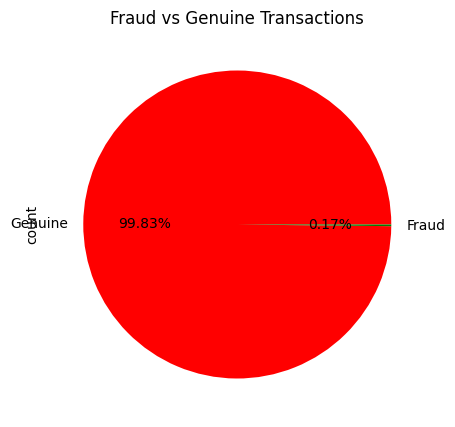

In [3]:
# Check fraud distribution
print("Fraudulent Cases:", len(dataset[dataset["Class"] == 1]))
print("Valid Transactions:", len(dataset[dataset["Class"] == 0]))
print("Proportion of Fraudulent Cases:", len(dataset[dataset["Class"] == 1]) / dataset.shape[0])

# Visualizing fraud vs genuine transactions
data_p = dataset.copy()
data_p["Label"] = np.where(data_p["Class"] == 1, "Fraud", "Genuine")

plt.figure(figsize=(5, 5))
data_p["Label"].value_counts().plot(kind="pie", autopct="%1.2f%%", colors=["red", "green"])
plt.title("Fraud vs Genuine Transactions")
plt.show()

In [4]:

# Distribution plots for 'Amount' and 'Time'
fig, axes = plt.subplots(1, 2, figsize=(18, 4), sharex=True)

sns.histplot(dataset['Amount'], kde=True, color="m", ax=axes[0])
axes[0].set_title('Distribution of Amount')

sns.histplot(dataset['Time'], kde=True, color="m", ax=axes[1])
axes[1].set_title('Distribution of Time')

plt.show()

In [5]:
# Average transaction amounts
print("Average Fraudulent Transaction Amount:", dataset[dataset["Class"] == 1]["Amount"].mean())
print("Average Valid Transaction Amount:", dataset[dataset["Class"] == 0]["Amount"].mean())

Average Fraudulent Transaction Amount: 122.21132113821139
Average Valid Transaction Amount: 88.29102242231328


In [6]:
# Summary statistics for 'Amount'
print("Summary of the feature - Amount\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [7]:
# Reorder columns: Move 'Amount' to the first column
amount = dataset['Amount']
dataset.drop(columns=['Amount'], inplace=True)
dataset.insert(0, 'Amount', amount)

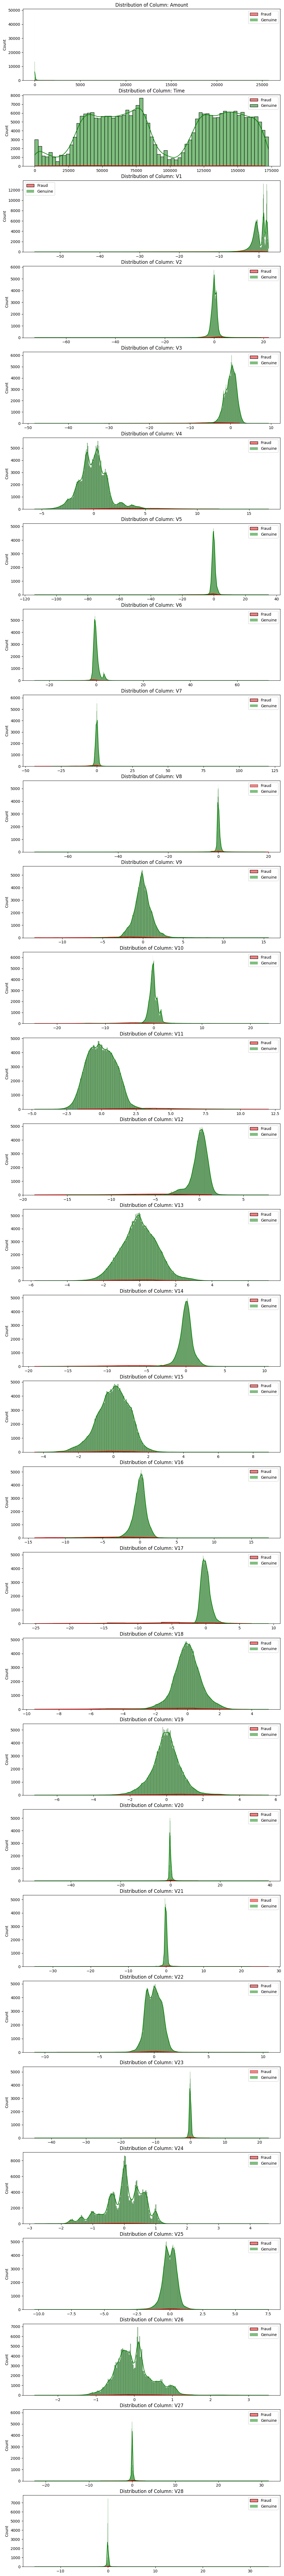

In [8]:
# Distribution of features for fraud and genuine transactions
columns = dataset.iloc[:, 0:30].columns
plt.figure(figsize=(12, 30 * 4))
grids = gridspec.GridSpec(30, 1)

for grid, index in enumerate(dataset[columns]):
    ax = plt.subplot(grids[grid])
    sns.histplot(dataset[index][dataset.Class == 1], kde=True, color="red", label="Fraud")
    sns.histplot(dataset[index][dataset.Class == 0], kde=True, color="green", label="Genuine")
    ax.set_xlabel("")
    ax.set_title("Distribution of Column: " + str(index))
    plt.legend()

plt.show()

In [9]:
# Check for missing values
missing_values = dataset.isnull().sum().sum()
print("Non-missing values:", dataset.shape[0] * dataset.shape[1] - missing_values)
print("Missing values:", missing_values)


Non-missing values: 8829017
Missing values: 0


In [10]:
# Feature Scaling for 'Time' & 'Amount'
scaler = RobustScaler()
dataset[["Time", "Amount"]] = scaler.fit_transform(dataset[["Time", "Amount"]])

In [11]:
# Display first and last few rows
print(pd.concat([dataset.head(), dataset.tail()]))

          Amount      Time         V1         V2        V3        V4  \
0       1.783274 -0.994983  -1.359807  -0.072781  2.536347  1.378155   
1      -0.269825 -0.994983   1.191857   0.266151  0.166480  0.448154   
2       4.983721 -0.994972  -1.358354  -1.340163  1.773209  0.379780   
3       1.418291 -0.994972  -0.966272  -0.185226  1.792993 -0.863291   
4       0.670579 -0.994960  -1.158233   0.877737  1.548718  0.403034   
284802 -0.296653  1.034951 -11.881118  10.071785 -9.834783 -2.066656   
284803  0.038986  1.034963  -0.732789  -0.055080  2.035030 -0.738589   
284804  0.641096  1.034975   1.919565  -0.301254 -3.249640 -0.557828   
284805 -0.167680  1.034975  -0.240440   0.530483  0.702510  0.689799   
284806  2.724796  1.035022  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V20       V21  \
0      -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.06

In [12]:
# Separate features (X) and target (y)
X = dataset.drop("Class", axis=1)
y = dataset["Class"]


In [13]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:

# Print dataset shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (227845, 30) (227845,)
Testing Data Shape: (56962, 30) (56962,)


RANDOM FOREST CLASSIFIER

In [15]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

In [17]:
# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56859     5]
 [   19    79]]


In [18]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Convert to percentage format
report_df *= 100

# Plot the heatmap with purple shades
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap="Purples", fmt=".2f", linewidths=1, cbar=True)

# Adjust labels and title
plt.title("Classification Report Heatmap", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.show()


In [19]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

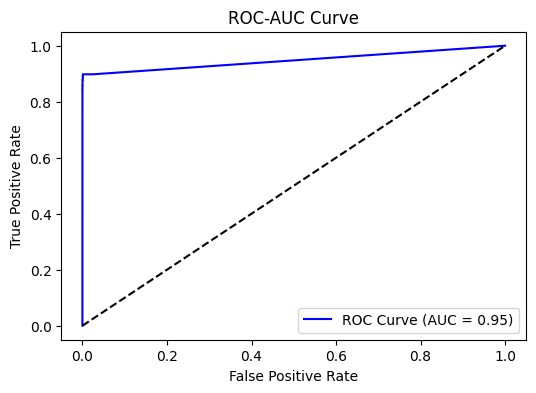

In [20]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

📌 Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


📌 Random Forest - Fraud Probabilities:
  Transaction 1: 0.0% Fraud Probability
  Transaction 2: 0.0% Fraud Probability
  Transaction 3: 0.0% Fraud Probability
  Transaction 4: 0.0% Fraud Probability
  Transaction 5: 0.0% Fraud Probability

📌 Random Forest AUC Score: 0.95

📌 Random Forest - Predictions vs Actual:
    Actual Fraud  Predicted Fraud  Fraud Probability (%)
0             0                0                    0.0
1             0                0                    0.0
2             0                0                    0.0
3             0                0                    0.0
4             0                0                    

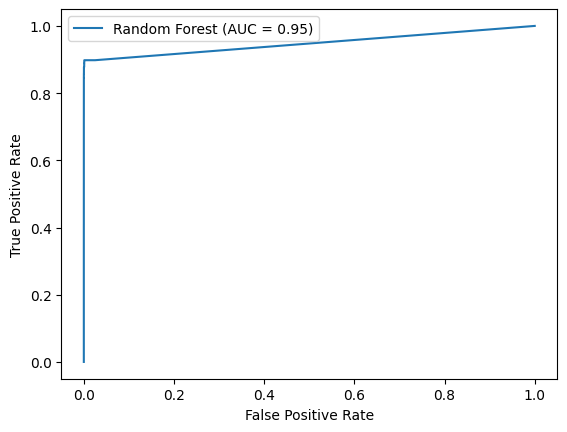

In [24]:
from sklearn.metrics import classification_report, roc_auc_score
# Predictions
rf_pred = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# 1️⃣ Precision, Recall, and F1-Score
print("📌 Random Forest Report:\n", classification_report(y_test, rf_pred))

# 2️⃣ Fraud Probability (%) for First 5 Transactions
print("\n📌 Random Forest - Fraud Probabilities:")
for i in range(5):
    print(f"  Transaction {i+1}: {round(rf_probs[i] * 100, 2)}% Fraud Probability")

# 3️⃣ AUC Score
rf_auc = roc_auc_score(y_test, rf_probs)
print("\n📌 Random Forest AUC Score:", round(rf_auc, 2))

# 4️⃣ Compare Predictions vs. Actual Fraud Cases
df_rf = pd.DataFrame({
    "Actual Fraud": y_test.values,
    "Predicted Fraud": rf_pred,
    "Fraud Probability (%)": rf_probs * 100
})
print("\n📌 Random Forest - Predictions vs Actual:\n", df_rf.head(10))

# 5️⃣ Count False Positives & False Negatives
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\n📌 Random Forest - False Positives: {fp}, False Negatives: {fn}")

# 6️⃣ Overfitting Percentage
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
overfitting = ((train_score - test_score) / train_score) * 100

print(f"\n📌 Random Forest Train Accuracy: {round(train_score, 4)}")
print(f"📌 Random Forest Test Accuracy: {round(test_score, 4)}")
print(f"📌 Random Forest Overfitting Percentage: {round(overfitting, 2)}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {round(rf_auc, 2)})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [25]:
# 5️⃣ Count False Positives & False Negatives
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\n📌 Random Forest - False Positives: {fp}, False Negatives: {fn}")


📌 Random Forest - False Positives: 5, False Negatives: 19
